#Importing

In [1]:
%matplotlib notebook
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *

init_notebook_mode(connected=True)                                                              # initiate notebook for offline plot
# libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# functions:
from sklearn.model_selection import train_test_split                                            #split data 
from sklearn.neighbors import KNeighborsClassifier                                              #KNN classifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score     #metrics 
from sklearn.dummy import DummyClassifier                                                       #Dummy classifier
from mlxtend.plotting import plot_learning_curves                                               #learning curves
from sklearn.model_selection import cross_val_score                                             #cross-validation

In [2]:
df = pd.read_csv('final_dataset.csv')                               #reading dataset

###Selecting columns and splitting data

In [3]:
# defining features names
features = list(df.columns)

In [4]:
target = "class"                                                    #target name
y = df[target].values                                               #target values
features.remove(target)                                             #removing target from features
x = df[features].values                                             #feature values

# splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =0)

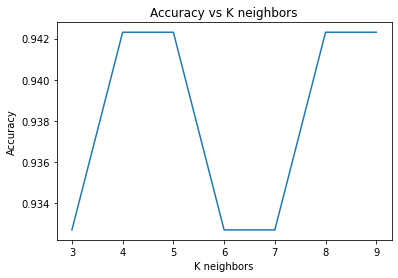

In [5]:
# Finding the optimum number of neighbors 
list1 = []                                                                        #list to storage precision scores
for neighbors in range(3,10):
    classifier = KNeighborsClassifier(n_neighbors=neighbors, metric='euclidean')  #KNN classifier
    classifier.fit(x_train, y_train)                                              #training
    y_pred = classifier.predict(x_test)                                           #predicting
    list1.append(accuracy_score(y_test,y_pred))                                  
plt.plot(list(range(3,10)), list1)
plt.title('Accuracy vs K neighbors')
plt.ylabel("Accuracy")
plt.xlabel('K neighbors')
#plt.savefig('image7.png')
plt.show()

In [6]:
# Training the K Nearest Neighbor Classifier on the training set
classifier = KNeighborsClassifier(n_neighbors=4, metric='euclidean')
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [7]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)
print(y_pred)

[1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 0. 0. 0. 1. 1. 1.]


#Evaluating

Dummy classifier

In [8]:
dummy_clf = DummyClassifier(strategy = 'most_frequent').fit(x_train, y_train)   #dummy classifier with stratified rule
y_dummy_predictions = dummy_clf.predict(x_test)                                 #making predictions with dummy classifier

y_dummy_predictions

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

In [9]:
dummy_clf.score(x_test, y_test)                 #accuracy score of dummy classifier


0.6153846153846154

In [10]:
precision_score(y_dummy_predictions, y_test)    #precision score of dummy classifier

1.0

In [11]:
recall_score(y_dummy_predictions, y_test)       #recall score of dummy classifier

0.6153846153846154

Train and test accuracy

In [12]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(classifier.score(x_train, y_train)))
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(classifier.score(x_test, y_test)))

Accuracy of KNN classifier on training set: 0.92
Accuracy of KNN classifier on test set: 0.94


Confusion matrix

Text(0.5, 15.0, 'Predicted label')

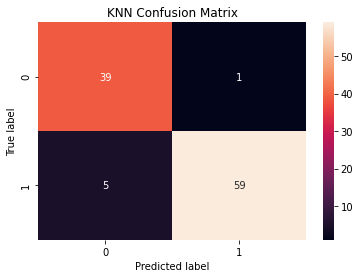

In [13]:
# Making the confusion matrix:
cm = confusion_matrix(y_test, y_pred)       #calculating (TP, TN, Fp and FN) 

df_cm = pd.DataFrame(cm)                    #transforming into a pd.DataFrame
sns.heatmap(df_cm, annot=True)              #plotting
plt.title('KNN Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
#plt.savefig('image8.png')

Curves

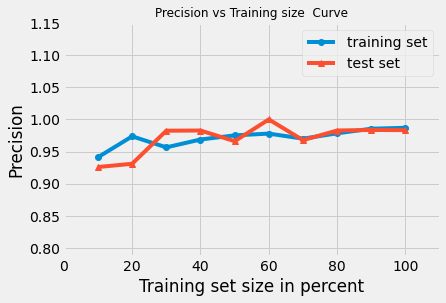

In [14]:
plot_learning_curves(x_train, y_train, x_test, y_test, classifier, scoring='precision', print_model=False)
plt.title('Precision vs Training size  Curve')
plt.ylabel('Precision')
#plt.savefig('image10.png')
plt.show()

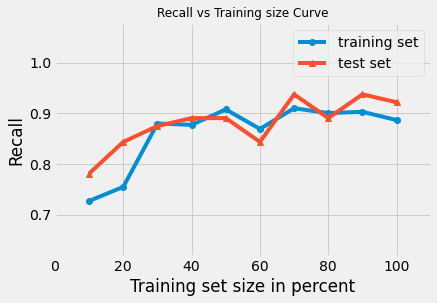

In [15]:
plot_learning_curves(x_train, y_train, x_test, y_test, classifier, scoring='recall', print_model=False)
plt.title('Recall vs Training size Curve')
plt.ylabel('Recall')
#plt.savefig('image9.png')
plt.show()

Cross-validation

In [16]:
precision = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 5, scoring= 'precision')

print("Precision: {:.2f} %".format(precision.mean()*100))
print("Standard Deviation: {:.2f} %".format(precision.std()*100))

Precision: 95.44 %
Standard Deviation: 1.88 %


In [17]:
recall = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 5, scoring='recall')

print("Recall: {:.2f} %".format(recall.mean()*100))
print("Standard Deviation: {:.2f} %".format(recall.std()*100))

Recall: 87.90 %
Standard Deviation: 4.98 %
